In [7]:
import efel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy
from scipy.signal import find_peaks
from scipy import signal
from scipy import stats
from scipy.optimize import curve_fit

In [10]:


#use neo to import either voltage or current clamp data in the correct, scaled units!
def load_neo_file(file_name, **kwargs):
    import neo
    reader = neo.io.get_io(file_name)
    blocks = reader.read(**kwargs)
    new_blocks = []
    for bl in blocks:
        new_segments = []
        for seg in bl.segments:
            traces = []
            count_traces = 0
            analogsignals = seg.analogsignals

            for sig in analogsignals:
                traces.append({})
                traces[count_traces]['T'] = sig.times.rescale('ms').magnitude
                #need to write an if statement here for conversion
                try:
                    traces[count_traces]['A'] = sig.rescale('pA').magnitude
                except:
                    traces[count_traces]['V'] = sig.rescale('mV').magnitude
                count_traces += 1
            new_segments.append(traces)
        #new_blocks.append(efel_segments)
    return new_segments

#Write a function to analyze an indiviudal feature for batch analysis from the efel package. This function will return a table with the feature values for each trace in the file.
def analyze_feature(path, feature):
    table2 = []
    os.chdir(path)
    for filename in os.listdir():
        table = pd.DataFrame(columns=[feature])     #create a table that has columns with the name you want
        table.name = feature                        #the tables name
        if filename.endswith(".axgd") or filename.endswith(".axgx"):    #check for the filetype
            [traces] = efel.io.load_neo_file(filename, stim_start=500, stim_end=1500)    #load the trace, and define stim start and stop
            for data in traces:    #loop through these guys
                #table.rename(columns={feature:filename}, inplace=True) #renaming the columns with the correct file !
                feature_values = efel.getFeatureValues(data, [feature], raise_warnings=None)[0]  #this is the feature extraction
                if feature_values[feature] is not None:
                    # Define the parameters for detection
                    efel.api.setThreshold(-10) # Voltage threshold for detection
                    efel.api.setDerivativeThreshold(20) # dV/dt threshold for detection
                    efel.setIntSetting('strict_stiminterval', True)
                    length = len(table)
                    table.loc[length, feature] = feature_values[feature][0]

                else:
                    efel.api.setThreshold(-10) # Voltage threshold for detection
                    efel.api.setDerivativeThreshold(20) # dV/dt threshold for detection
                    efel.setIntSetting('strict_stiminterval', True)
                    length = len(table)
                    table.loc[length, feature] = feature_values[feature]

            table2.append(table)
            df_concat = pd.concat(table2, axis=1)
            table.rename(columns={feature:filename}, inplace=True) #renaming the columns with the correct file !
            #block of code to combine all of the generated excel workbooks into a single workbook
            df_concat.to_excel(feature + 'master_file.xlsx', index=False)
    Current_injected = np.linspace(-100.0, 500.0, num=61)
    table2 = df_concat.assign(Current_injected=Current_injected)
    #lineplot = df_concat.plot()
    #sns_lineplot = sns.relplot(data = table2, x = "Spikecount_stimint", y = 'Current_injected', kind="line")
    return(df_concat)


In [4]:
cc_path = os.getcwd()

In [6]:
#these code are well documented on efels github page. With strong documentation. These code are only used for the evoked spikes. All spontaneous firing code can be found in the "Example Files" folder. Here we use a steeper threshold for the detection of spikes. 
#these code return excel sheets that will be saved in the path that you are currently in with all of the data. I have included a few example files to show you how to use the code.
os.chdir(cc_path)
f_i = analyze_feature(cc_path, feature='Spikecount_stimint')
# analyze_feature(cc_path, feature='ISI_CV')
# analyze_feature(cc_path, feature='time_to_first_spike')
# 
# analyze_feature(cc_path, feature='mean_frequency')
# analyze_feature(cc_path, feature='steady_state_voltage_stimend')
# analyze_feature(cc_path, feature='doublet_ISI')
# analyze_feature(cc_path, feature='amp_drop_first_last')
# analyze_feature(cc_path, feature='spike_half_width')

/var/folders/tr/d3sb9tn97_l9_srzzlwr7w180000gr/T/ipykernel_73703/2089877231.py:38: DeprecationWarning: Use get_feature_values instead
  feature_values = efel.getFeatureValues(data, [feature], raise_warnings=None)[0]  #this is the feature extraction
/var/folders/tr/d3sb9tn97_l9_srzzlwr7w180000gr/T/ipykernel_73703/2089877231.py:41: DeprecationWarning: Use set_threshold instead
  efel.api.setThreshold(-10) # Voltage threshold for detection
/var/folders/tr/d3sb9tn97_l9_srzzlwr7w180000gr/T/ipykernel_73703/2089877231.py:42: DeprecationWarning: Use set_derivative_threshold instead
  efel.api.setDerivativeThreshold(20) # dV/dt threshold for detection
/var/folders/tr/d3sb9tn97_l9_srzzlwr7w180000gr/T/ipykernel_73703/2089877231.py:43: DeprecationWarning: Use set_int_setting instead
  efel.setIntSetting('strict_stiminterval', True)
/var/folders/tr/d3sb9tn97_l9_srzzlwr7w180000gr/T/ipykernel_73703/2089877231.py:38: DeprecationWarning: Use get_feature_values instead
  feature_values = efel.getFeature

In [9]:
#set spike count stim int 

,211227 3xtg control 52 week old male hci1 009.axgd,211227 3xtg control 52 week old male hci1 005.axgd,220214 3xTg control HcAM1 51 weeks 012.axgd,211227 3xtg control 52 week old male hci1 015.axgd,Spikecount_stimint
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
56,7,4,4,10,5
57,5,5,3,11,6
58,6,4,3,11,4
59,5,6,4,11,2


<Axes: >

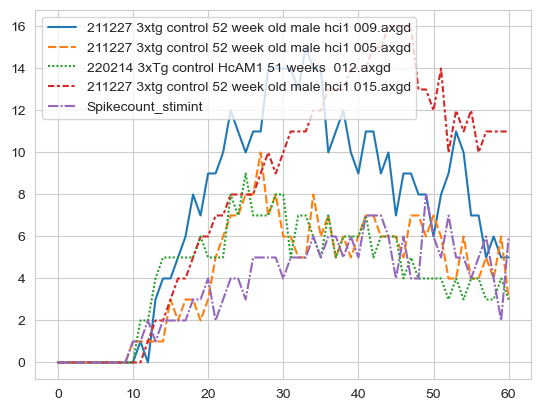

In [8]:
sns.lineplot(data = f_i)